# EX-1: Form Feedback


Submitted the form.

# EX-2 & EX-3 : Dynamic Hashing




Ex-2:As the paper I chose was Space Efficiency and Dynamic Hashing. I understood most of the concepts of dynamic hashing from it but the following slides provided were very accurate in explanation of extendible hashing.
There is a lot of online material to learn about Extendible/Dynamic Hashing. I surfed through some of the wiki pages to understand the concept. I checked a very awesome tutorial on extendible hashing shown in the video
https://www.youtube.com/watch?v=r4GkXtH1la8 and the site mentioned in the question 
https://loonytek.com/2016/05/17/extendible-hashing/

To understand the concept of Dynamic hashing I looked through the logic behind linear hashing as mentioned in the article link. I got this understanding from linear hashing that it grows bucket by bucket. Also as I mentioned earlier the paper I studied was related to multi-way cuckoo hashing and DySECT i.e. Dynamic Space efficient Cuckoo Table. 
In case of our particular topic the brief explanation is as follows: 


Ex-3:
Extendible hashing is a dynamic hashing scheme, which allows reorganization of hash tables and automatically computes the new location i.e. bucket of the elements in a hash table when a table is resized. The insertion of new elements in any bucket is solely dependent on global depth and local depth.
Global Depth: Given a key K in a hash function H, H maps the key to the directory or page entry. Global depth is equal to the number of bits used from the hash value generated by H where H is a Hash function.
Local Depth: Number of Least Significant Bits (LSBs) shared by each members or LSBs used from the hash value. Following are the main operations while performing extendible hashing:

1. If local depth = global depth<br>
a. Double hash table size<br>
b. Allocate space for an additional bucket<br>
c. Redistribute filled pages’ indices<br>
d. If the bucket size is full and no new item can be placed in this bucket, then split the bucket <br>

2. The connection between bucket split is established using pointers. Each page in the (in local depth) has one or more associated pointers from the hash table (in global depth) <br>
3. If local depth is more than global depth<br>
a. Increase the LSBs in global depth and<br>
b. Allocate new page<br>
c. Redistribute the elements in the pages according to the new page <br>
Check the following example for detail explanation:<br>


References 
1.	https://courses.cs.washington.edu/courses/cse326/00wi/handouts/lecture17/sld009.htm
2.	http://slideplayer.com/slide/8589422/
3.  https://www.youtube.com/watch?v=r4GkXtH1la8




#### Image 1,2 taken from video referenced above

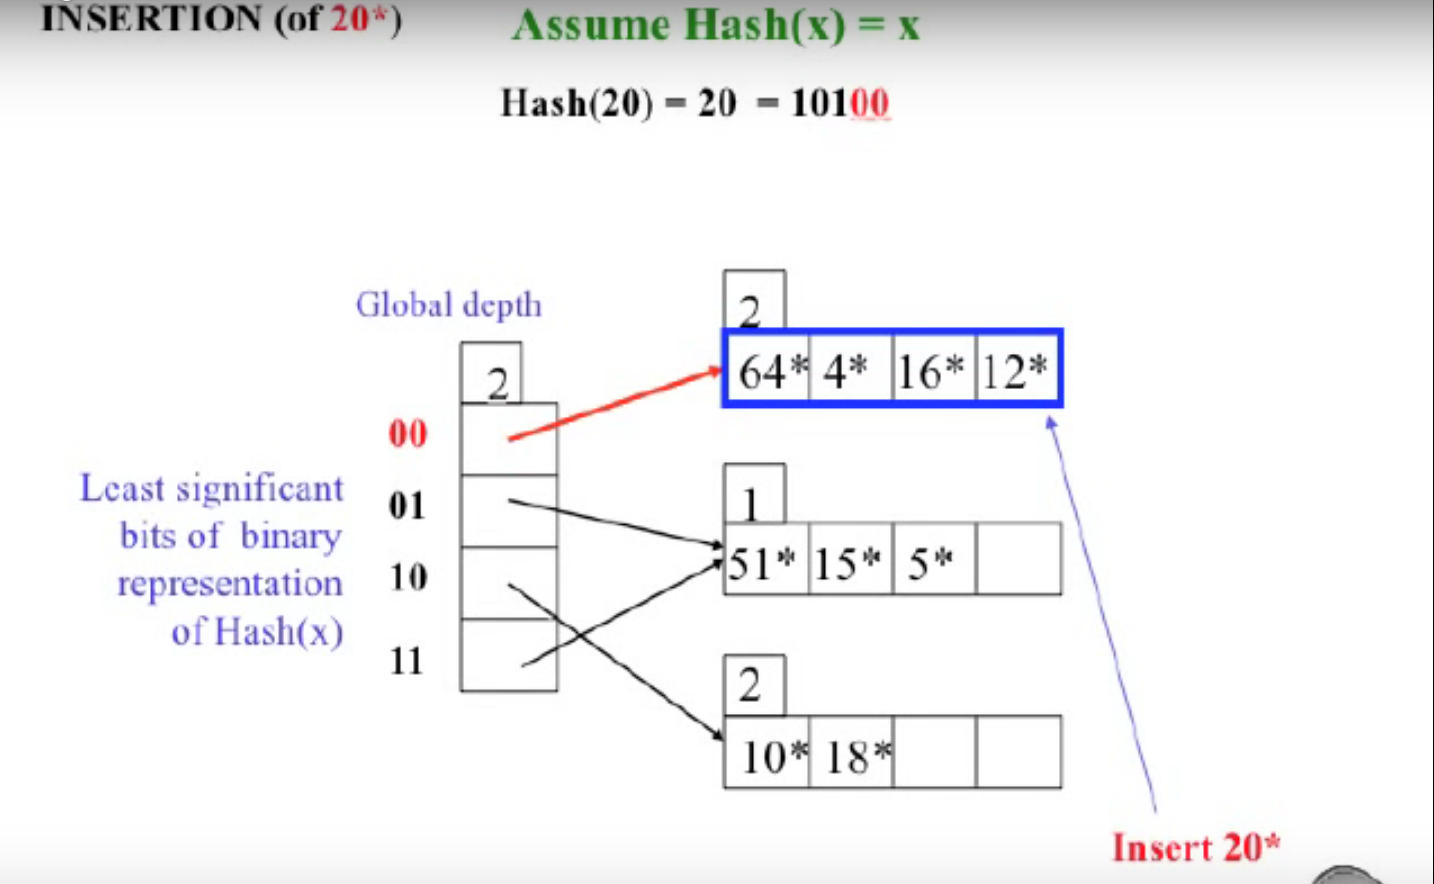

In [852]:
from IPython.display import Image
Image(filename='extendible_hashing_tut.png')

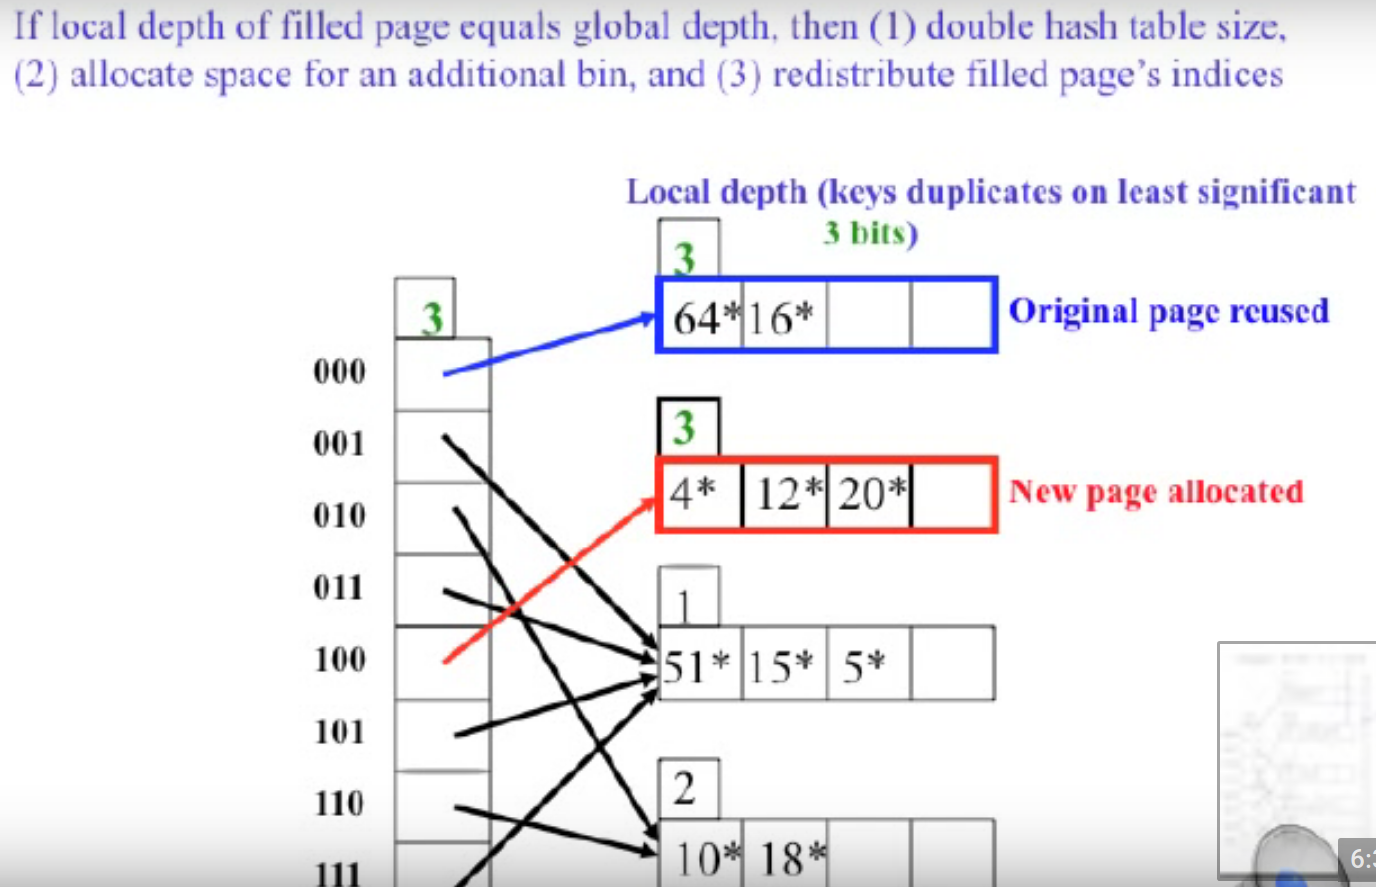

In [853]:
from IPython.display import Image
Image(filename='extendible_hashing_tut2.png')

### On Paper Explanation

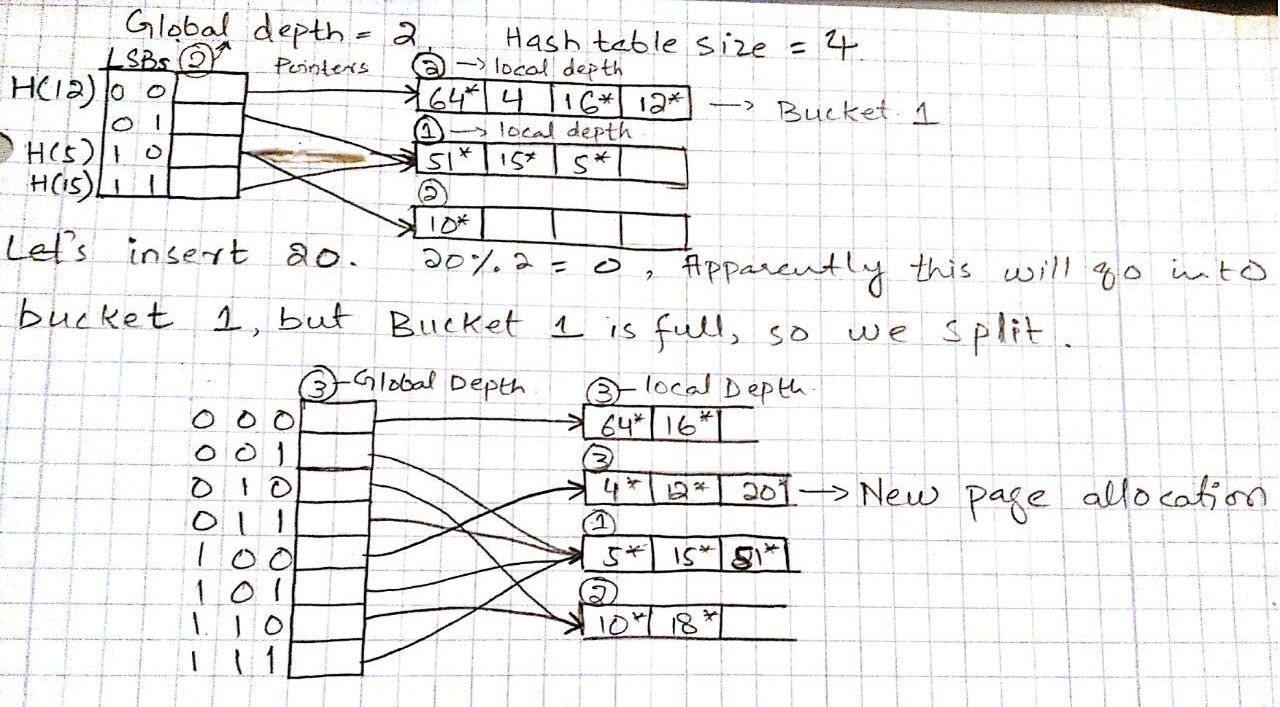

In [854]:
from IPython.display import Image
Image(filename='index.jpeg')

# EX-4 Distribution of Nodes Degree

In [759]:
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy as np
import sys 
import random
import math
import time

#### Graph datasets

In [834]:
p2p_Gnute = np.loadtxt('p2p-Gnutella09.txt')
email_eu = np.loadtxt('email-Eu-core.txt')
cosmology = np.loadtxt('CA-GrQc.txt')
Gnute_24 = np.loadtxt('p2p-Gnutella24.txt')


#### Graph Class Handles all the operations of Ex-4 and Ex-5

In [822]:
class Graph:
    name=""
    num_of_nodes=0
    num_of_edges=0
    
    Graph_Data=[]
    Nodes=[]
    degree_of_nodes=[]
    count_of_degree=[]
    d_dictionary ={}
    
    
    def __init__(self,graph_data,name):
        
        self.name=name;
        self.Graph_Data=graph_data
        self.num_of_edges= self.calc_edges()
        self.num_of_nodes = self.calc_nodes()
        self.degree_of_nodes= np.ndarray((self.num_of_nodes,),int)
        self.distribution_of_node_degrees()
        self.count_of_degree_nodes()
        
        self.d_dictionary = defaultdict(list)
        for k, v in graph_data:
            self.d_dictionary[k].append(v)
        for k, v in graph_data:
            self.d_dictionary[v].append(k)
        

    def calc_nodes(self):
        
        for i in self.Graph_Data[:,0]:
            if(i not in self.Nodes):
                self.Nodes.append(i)
        
        for i in self.Graph_Data[:,1]:
            if(i not in self.Nodes):
                self.Nodes.append(i)
        self.Nodes.sort()    
        return len(self.Nodes)
    
    
    def calc_edges(self):
        return len(self.Graph_Data)
    
    
    def distribution_of_node_degrees(self):
        temp=[]
        for i in self.Graph_Data[:,0]:
            
            if(i in temp):
                index=temp.index(i)
                self.degree_of_nodes[index]=self.degree_of_nodes[index]+1
                
            else:
                temp.append(i)
                index=temp.index(i)
                self.degree_of_nodes[index]=1
        
        for i in self.Graph_Data[:,1]:
            
            if(i in temp):
                index=temp.index(i)
                self.degree_of_nodes[index]=self.degree_of_nodes[index]+1
                
            else:
                temp.append(i)
                index=temp.index(i)
                self.degree_of_nodes[index]=1
                
                
    def count_of_degree_nodes(self):
        temp=[]
        for i in self.degree_of_nodes:
            
            if(i in temp):
                
                index=temp.index(i)
                self.count_of_degree[index][1]=self.count_of_degree[index][1]+1
                
            else:
                temp.append(i)
                self.count_of_degree.append([i,1])

                
  # Method used from this link
  #https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/
    
    def bfs_connected_component(self,graph, start):
        # keep track of all visited nodes
        explored = []
        # keep track of nodes to be checked
        queue = [start]

        # keep looping until there are nodes still to be checked
        while queue:
            # pop shallowest node (first node) from queue
            node = queue.pop(0)
            if node not in explored:
                # add node to list of checked nodes
                explored.append(node)
                neighbours = graph[node]

                # add neighbours of node to queue
                for neighbour in neighbours:
                    queue.append(neighbour)
        return explored
    
    
    # Method used from this link
    #https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/

    def bfs_shortest_path(self,graph, start, goal):
        # keep track of explored nodes
        explored = []
        # keep track of all the paths to be checked
        queue = [[start]]

        # return path if start is goal
        if start == goal:
            return []

        # keeps looping until all possible paths have been checked
        while queue:
            
            # pop the first path from the queue
            path = queue.pop(0)
            # get the last node from the path
            
            node = path[-1]
            
            if node not in explored:
                neighbours = graph[node]
                # go through all neighbour nodes, construct a new path and
                # push it into the queue
                for neighbour in neighbours:
                    if neighbour not in explored:
                        new_path = list(path)
                        new_path.append(neighbour)
                        queue.append(new_path)
                        # return path if neighbour is goal
                        if neighbour == goal:
                            return new_path
                
                
                if(node not in explored):
                    explored.append(node)

        return []
 

-------< Email EU >-------

Number of Nodes = 26518
Number of edges = 25571


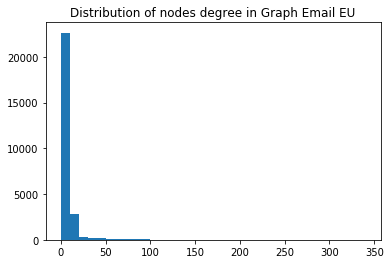

-------< Peer 2 Peer >-------

Number of Nodes = 26518
Number of edges = 26013


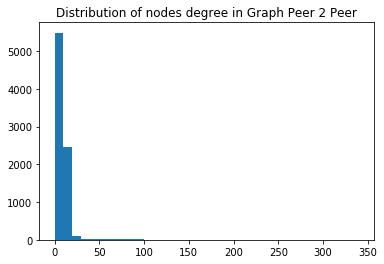

-------< Gnute_24 >-------

Number of Nodes = 26518
Number of edges = 65369


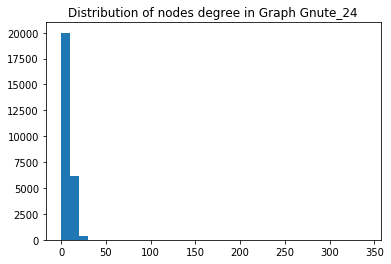

-------< Cosmology >-------

Number of Nodes = 26518
Number of edges = 28980


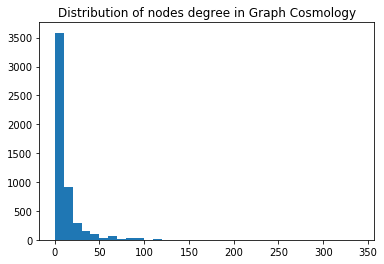

In [835]:
graph=[]
graph.append(Graph(email_eu,"Email EU"))
graph.append(Graph(p2p_Gnute,"Peer 2 Peer"))
graph.append(Graph(Gnute_24,"Gnute_24"))
graph.append(Graph(cosmology,"Cosmology"))

i=0
bins=[]
while(i!=350):
    bins.append(i)
    i+=10

for i in range(len(graph)):
    print("-------< %s >-------\n"%graph[i].name)
    print("Number of Nodes = %d"%graph[i].num_of_nodes)
    print("Number of edges = %d"%graph[i].num_of_edges)

    plt.hist(graph[i].degree_of_nodes, bins, histtype='bar', rwidth=2)

    plt.title('Distribution of nodes degree in Graph %s'%graph[i].name)
    plt.show()


# EX-5: Breadth First Search and Estimates

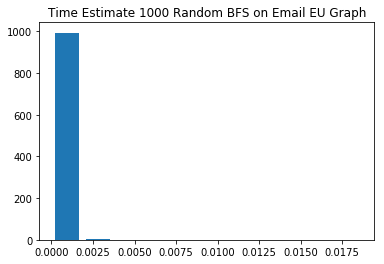

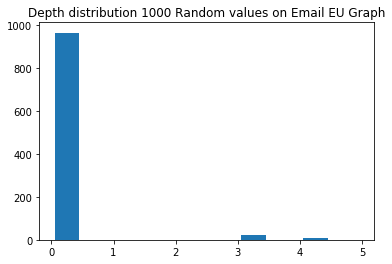

-------< Email EU >-------

Estimated Diameter of Graph = 5


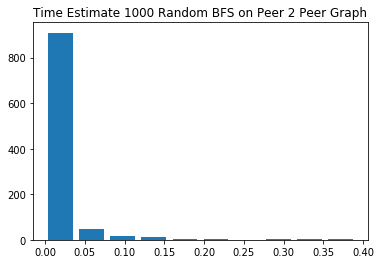

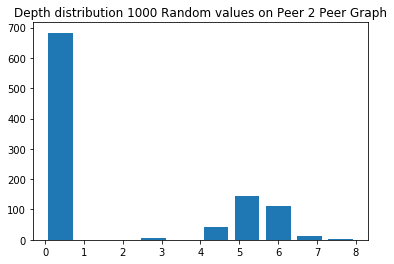

-------< Peer 2 Peer >-------

Estimated Diameter of Graph = 8


In [836]:
for i in range(2):
    
    timer=[]
    depths=[]
    
    for j in range(1000):
        rand=random.choice(graph[i].Nodes)
        rand_target = random.choice(graph[i].Nodes)
        start = time.time()
        depth = len(graph[i].bfs_shortest_path(graph[i].d_dictionary, rand, 3))
        end = time.time()
        timer.append(end-start)
        depths.append(depth)
    
    plt.hist(timer, histtype='bar', rwidth=0.8)
    plt.title('Time Estimate 1000 Random BFS on %s Graph'%graph[i].name)
    plt.show()
    
    plt.hist(depths, histtype='bar', rwidth=0.8)
    plt.title('Depth distribution 1000 Random values on %s Graph'%graph[i].name)
    plt.show()
    print("-------< %s >-------\n"%graph[i].name)
    print("Estimated Diameter of Graph = %d"%max(depths))

### Testing with fixed target and 10k searches

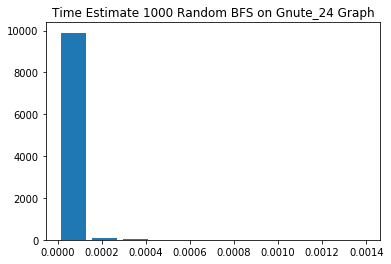

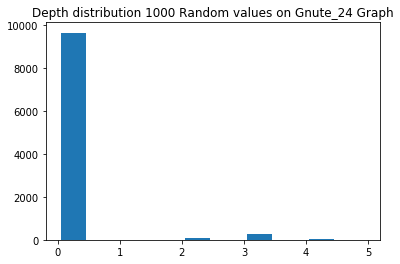

-------< Gnute_24 >-------

Estimated Diameter of Graph = 5


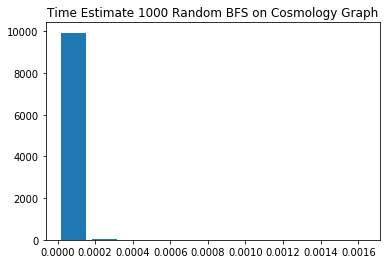

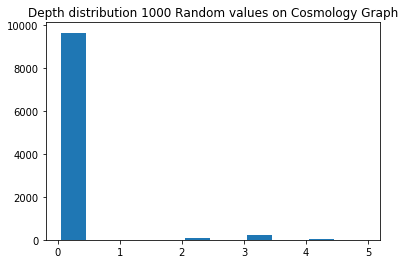

-------< Cosmology >-------

Estimated Diameter of Graph = 5


In [850]:
for i in range(2,4):
    
    timer=[]
    depths=[]

    for j in range(10000):
        rand=random.choice(graph[i].Nodes)
        rand_target = random.choice(graph[i].Nodes)
        start = time.time()
        depth = len(graph[i].bfs_shortest_path(graph[0].d_dictionary, rand, 62))
        end = time.time()
        timer.append(end-start)
        #print(len(timer))
        depths.append(depth)

    plt.hist(timer, histtype='bar', rwidth=0.8)
    plt.title('Time Estimate 1000 Random BFS on %s Graph'%graph[i].name)
    plt.show()

    plt.hist(depths, histtype='bar', rwidth=0.8)
    plt.title('Depth distribution 1000 Random values on %s Graph'%graph[i].name)
    plt.show()
    print("-------< %s >-------\n"%graph[i].name)
    print("Estimated Diameter of Graph = %d"%max(depths))